In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# The target value quality can be treated both as numerical or categorical. 
# I've considered it as categorical.

a = list(df["quality"].unique())
a.sort()
print(a)

[3, 4, 5, 6, 7, 8]


In [8]:
# Binning the quality column into 0, 1 and 2.

def helper(row):
    if row.quality < 4.5:
        return 0
    elif row.quality < 6.5:
        return 1
    else:
        return 2

In [9]:
df["quality"] = df.apply(helper,axis=1)
df['quality'].value_counts()

quality
1    1319
2     217
0      63
Name: count, dtype: int64

# **Exploratory Data Analysis**

In [10]:
# Separating feautures and labels

X = df.drop('quality',axis=1)
y = df[['quality']]

print(X.columns)
print(y.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['quality'], dtype='object')


In [11]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


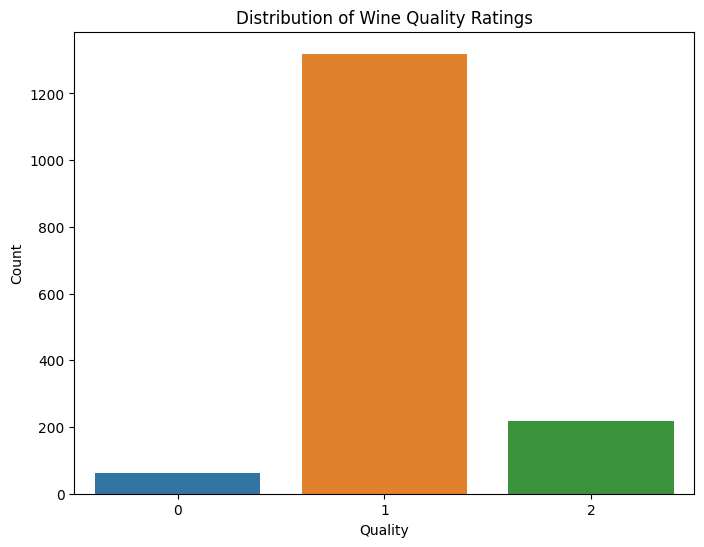

In [15]:
# Distribution of Quality Ratings

plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

<Axes: >

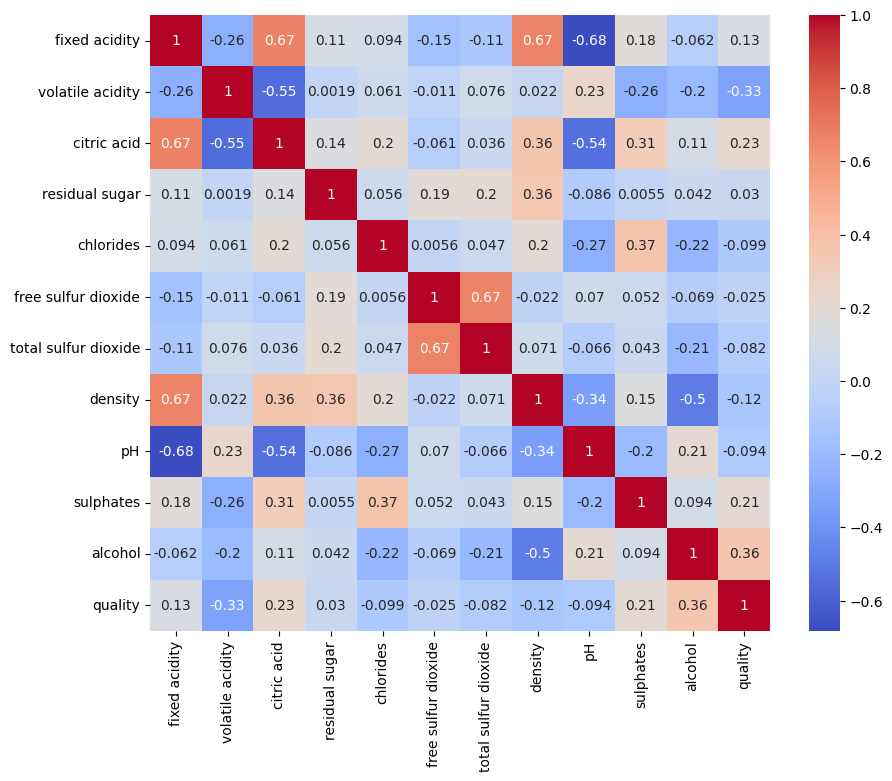

In [13]:
# Corelation matrix

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

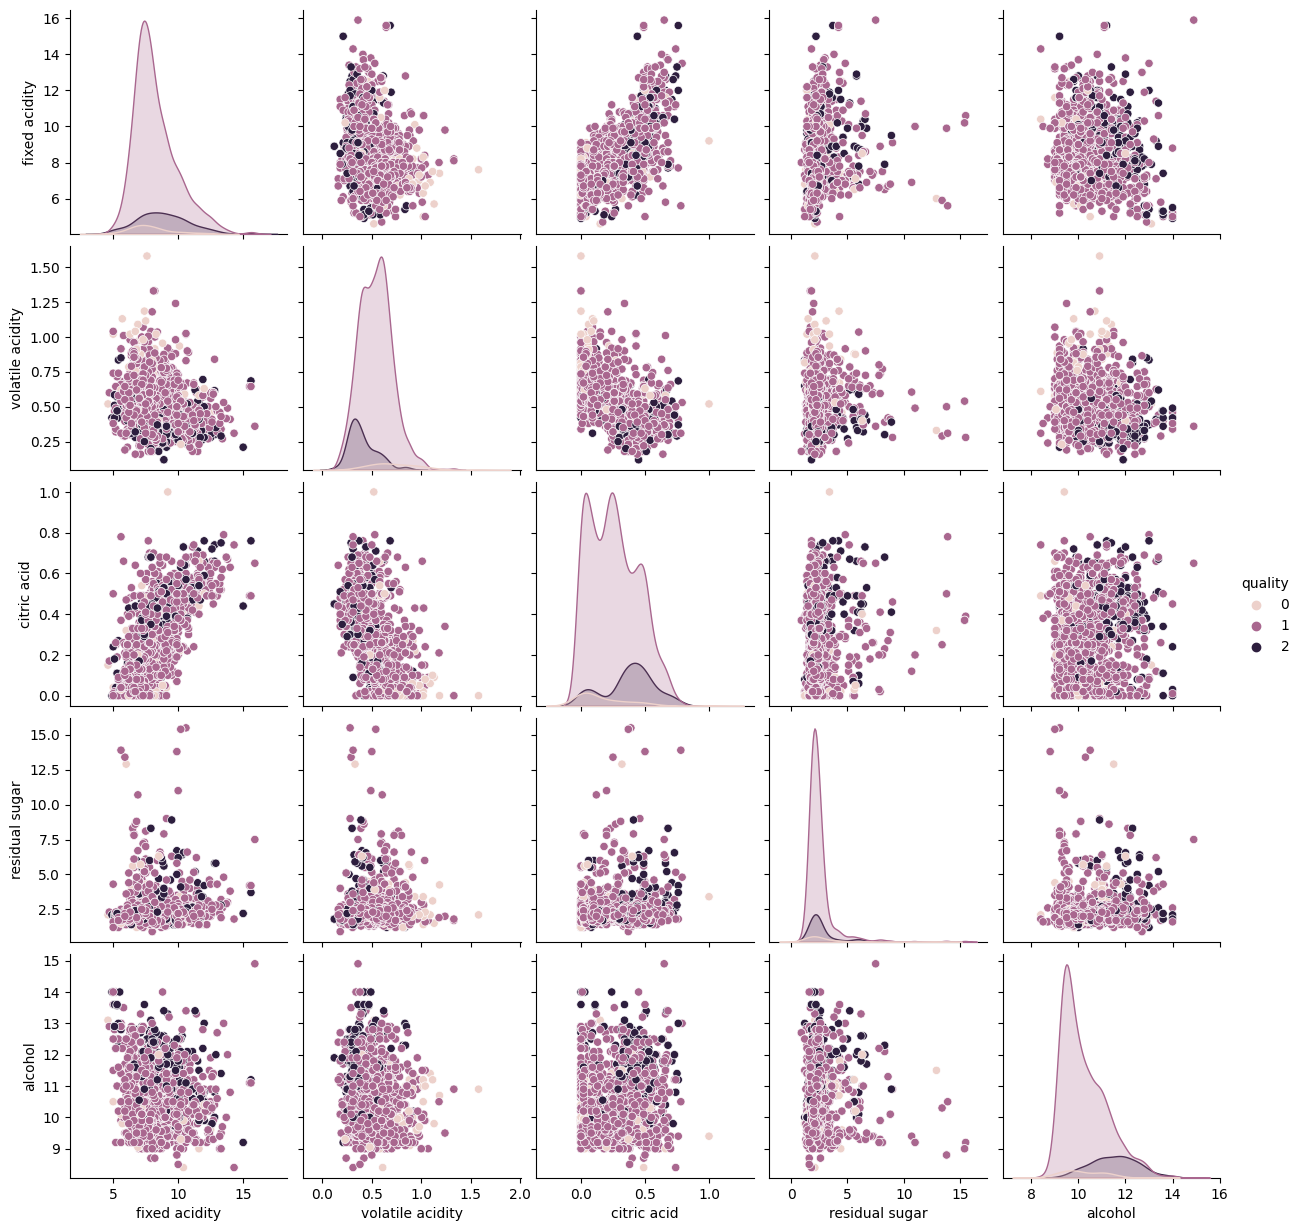

In [16]:
# Pair Plot for Key Features

sns.pairplot(df, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol'], hue='quality')
plt.show()

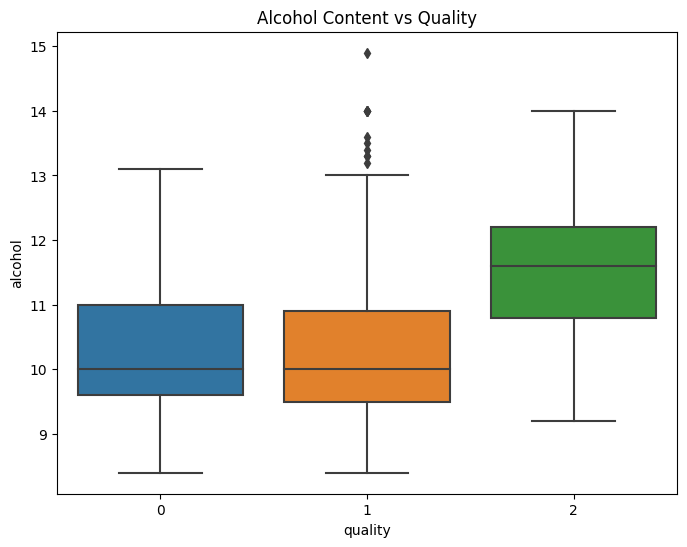

In [17]:
# Box Plot of Alcohol Content by Quality

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol Content vs Quality')
plt.show()

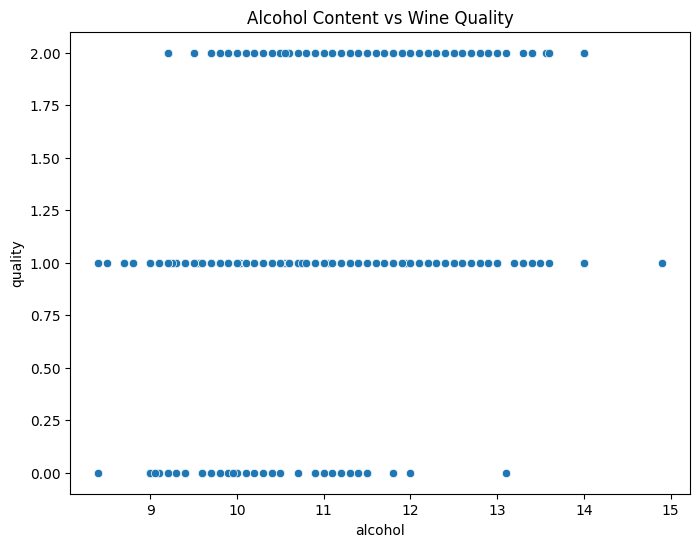

In [18]:
# Scatter Plot of Alcohol Content vs Quality

plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Alcohol Content vs Wine Quality')
plt.show()

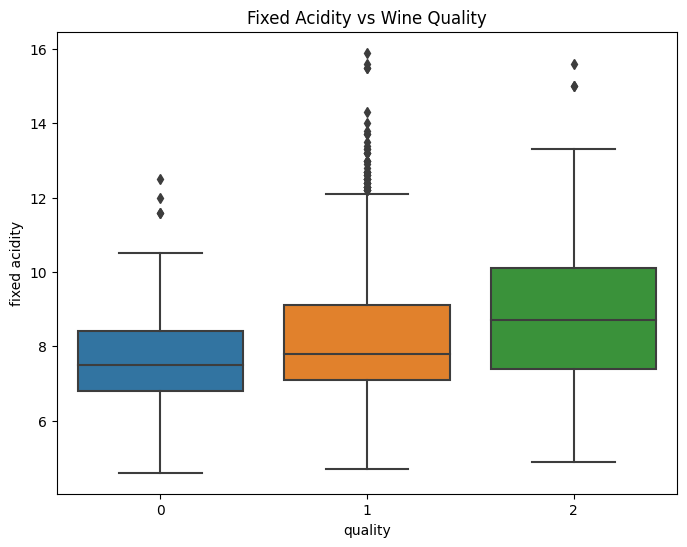

In [19]:
# Fixed Acidity vs Quality

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='fixed acidity', data=df)
plt.title('Fixed Acidity vs Wine Quality')
plt.show()

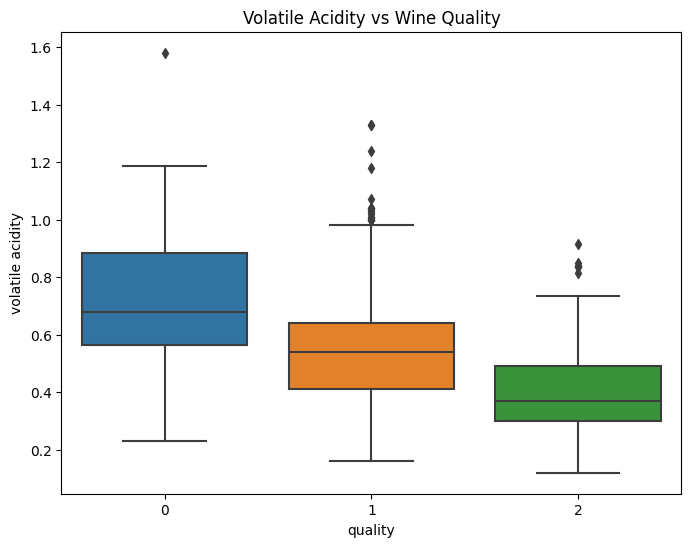

In [20]:
# Volatile Acidity vs Quality

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Volatile Acidity vs Wine Quality')
plt.show()

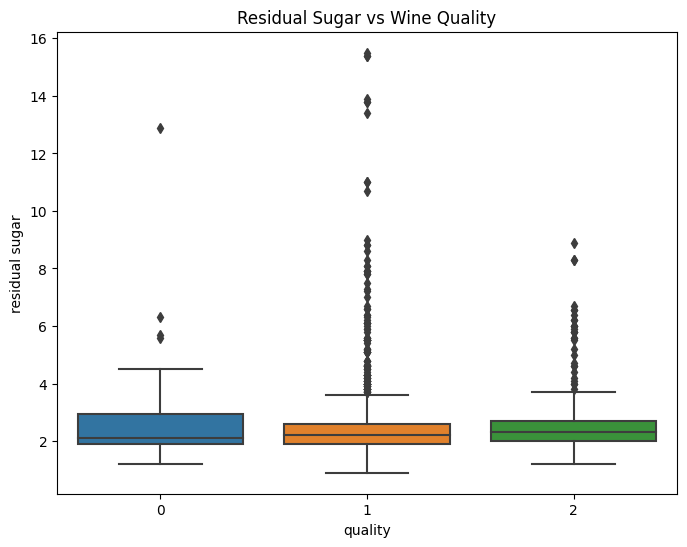

In [21]:
# Residual Sugar vs Quality

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='residual sugar', data=df)
plt.title('Residual Sugar vs Wine Quality')
plt.show()

In [22]:
df.corr(numeric_only=True)['quality'].sort_values()

volatile acidity       -0.333816
density                -0.123566
chlorides              -0.098829
pH                     -0.093946
total sulfur dioxide   -0.081960
free sulfur dioxide    -0.025075
residual sugar          0.030153
fixed acidity           0.125886
sulphates               0.205409
citric acid             0.228930
alcohol                 0.361363
quality                 1.000000
Name: quality, dtype: float64

In [23]:
print(df.shape)
print(X.shape)
print(y.shape)

(1599, 12)
(1599, 11)
(1599, 1)


In [24]:
# Handling the outliers

df = df.drop(df[df["fixed acidity"] > 14].index)
df = df.drop(df[df["volatile acidity"] > 1.2].index)
df = df.drop(df[df["citric acid"] > 0.9].index)
df = df.drop(df[df["residual sugar"] > 10].index)
df = df.drop(df[df["chlorides"] > 0.3].index)
df = df.drop(df[df["free sulfur dioxide"] > 50].index)
df = df.drop(df[df["total sulfur dioxide"] > 200].index)

cond_den_1 = df["density"] > 1.003
cond_den_2 = df["density"] < 0.991
df = df.drop(df[cond_den_1 | cond_den_2].index)

cond_ph_1 = df["pH"] > 3.8
cond_ph_2 = df["pH"] < 2.8
df = df.drop(df[cond_ph_1 | cond_ph_2].index)

df = df.drop(df[df["sulphates"] > 1.25].index)
df = df.drop(df[df["alcohol"] > 14].index)

print("Shape after removing the outliers...")
df.shape

Shape after removing the outliers...


(1519, 12)